Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[Arkadz Kirshtein](https://math.tufts.edu/people/facultyKirshtein.htm) <arkadz.kirshtein@tufts.edu>  
*Spring 2021*

*Based on materials created by James Adler and George McNinch*

Course material (Week 7): Finite-state machines
-------------------------------------------------------

Finite-state machines
---------------------

In this discussion, we are going to use a form of graph model to represent *states* and transitions between them.

Let's start with a pretty simple example:

Example: a door
---------------

We are going to model exactly two states: *open*, and *shut*.

We represent these states as *nodes* in a directed graph. 

The edges in the directed graph will represent *transitions*: we can *open the door* and we can *shut the door*.

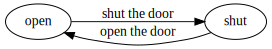

In [1]:
from graphviz import Digraph
door = Digraph()
door.attr(rankdir='LR')
door.node("open")
door.node("shut")
door.edge("shut","open","open the door")
door.edge("open","shut","shut the door")

door

Example; elevator:
------------------

Consider an elevator in a building with two floors.

We'll model two states: *first floor* and *second floor*.

Inside the elevator, there two buttons: *up* and *down*.

When the elevator is on the first floor, pushing the up button initiates a trip up, but the up button does nothing when the elevator is on the second floor.

Similar remarks hold for the down button. 

We can model these states and transitions using the following diagram:

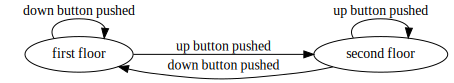

In [2]:
from graphviz import Digraph
elev = Digraph()
elev.attr(rankdir='LR')
elev.node("first floor")
elev.node("second floor")

elev.edge("first floor","second floor","up button pushed")
elev.edge("first floor","first floor","down button pushed")
elev.edge("second floor","first floor","down button pushed")
elev.edge("second floor","second floor","up button pushed")

elev

Definition of finite-state machine
----------------------------------

A finite state machine (FSM, also called a finite-state automatata or FSA) is an ordered collection
$(\Sigma,S,s_o,\delta,F)$ where:  
-- $\Sigma$ is the "alphabet", a finite and non-empty set of symbols  
-- $S$ is a finite, non-empty set of states  
-- $s_o \in S$ is an initial state  
-- $\delta:S \times \Sigma \to S$ is the state-transition function  
-- $F \subset S$ is the set of final states ($F$ is possibly empty). 

Given a finite state machine $M = (\Sigma,S,s_o,\delta,F)$.

If $M$ is in state $s$, then after applying the symbol $x \in \Sigma$, $M$ is in state
$\delta(s,x)$.

If $M$ is in state $s$, then we can apply a sequence $x_1,x_2,\dots,x_n$ of symbols in $M$.
After applying the sequence, $M$ is in state
$$\delta(\cdots(\delta(\delta(\delta(s,x_1),x_2),x_3),\dots),x_n)$$

**Remark**: sometimes $\delta$ is permitted to be a *partial* function. Thus, $\delta$ may not be defined for all pairs $(s,x) \in S \times \Sigma$.

Example:
--------

Consider a finite state machine which receives a sequence of characters, and checks whether the string is equal to "ant".

The initial state is "start".

The final states are "received 'ant'" and "didn't receive 'ant'"

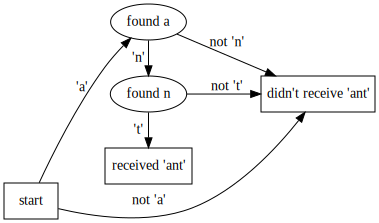

In [20]:
ant = Digraph("ant")
ant.attr(rankdir='LR')

ant.node("start",shape='box')

with ant.subgraph() as c:
    ant.attr(rank='same')
    c.node("found a")
    c.node("found n")
    c.node("received 'ant'",shape='box')

ant.node("didn't receive 'ant'",shape='box')

ant.edge("start","found a","'a'")
ant.edge("start","didn't receive 'ant'","not 'a'")
ant.edge("found a","found n","'n'")
ant.edge("found a","didn't receive 'ant'","not 'n'")
ant.edge("found n","received 'ant'","'t'")
ant.edge("found n","didn't receive 'ant'","not 't'")
ant

Probability and transition
--------------------------

Finite state machines provide a useful way of describing systems where the transitions between states
have a probabilistic description.

For example:

"drunkard's walk"
-----------------

This is a so-called random walk. You are given nodes labelled by integers $n \in \mathbb{Z}$.
(so: infinitely many nodes!)

For each integer $n$, there is an edge $n \to n+1$ labelled with $0.5$, and there is an edge
$n \to n-1$ labelled with $0.5$.

Let's make a partial diagram:

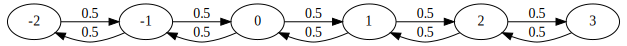

In [3]:
dw = Digraph("dw")
partial = list(range(-2,4))
dw.attr(rankdir='LR')

for n in partial:
    dw.node(f"{n}")
    
for n in partial:
    if n+1 in partial:
        dw.edge(f"{n}",f"{n+1}","0.5")
        
for n in partial:
    if n-1 in partial:
        dw.edge(f"{n}",f"{n-1}","0.5")
        
dw

This system can be understood as follows. A state represents the position of some object. The object undergoes state changes -- "move left" or "move right" -- with equal probability.

multi-dimensional version
-------------------------

Of course, the "drunkard's walk" need not just occur in a line!

One might consider states labelled by pairs $(m,n) \in \mathbb{Z} \times \mathbb{Z}$.

Consider edges  
-- $(m,n) \to (m+1,n)$   
-- $(m,n) \to (m,n+1)$  
-- $(m,n) \to (m-1,n)$  
-- $(m,n) \to (m,n-1)$

In this case, the object undergoes state changes ("move up", "move right", "move left", "move down") each with probability 1/4.

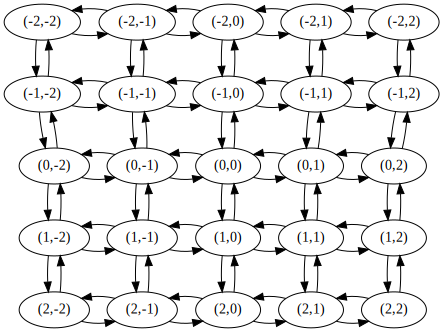

In [4]:
import itertools as it

ddw = Digraph("dw")

p = list(range(-2,3))

pp = list(it.product(p,p))

for m in p:
    with ddw.subgraph() as c:
        c.attr(rank='same')
        for n in p:
            c.node(f"({m},{n})")
            
for (m,n) in pp:
    if (m+1,n) in pp:
        ddw.edge(f"({m},{n})",f"({m+1},{n})")
    if (m,n+1) in pp:
        ddw.edge(f"({m},{n})",f"({m},{n+1})")
    if (m-1,n) in pp:
        ddw.edge(f"({m},{n})",f"({m-1},{n})")
    if (m,n-1) in pp:
        ddw.edge(f"({m},{n})",f"({m},{n-1})")

ddw        

Transition probabilities
-------------------------

We want to track the state of a probabilistic FSM. Let's describe this using our example.

For the (1 dimensional) drunkard's walk, consider the following description:

- at time 0, we begin at state 0.
- at time 1, we are at state 1 with .50 probabilty, and we are at state -1 with .50 probability
- at time 2, we are at state 2 with .25 probability, at state 0 with .50 probability, and state -2 with .25 probability
- at time 3, we are at state 3 with probability .125, at state 1 with probability .375, at state -1 with probability .375, and state   -3 with probability .125

etc...



For the 2 dimensional version, 

- time 0, state (0,0)
- time 1

| state | prob | 
| -----:| ----:|
| (1,0) | .25  |
| (0,1) | .25  |
| (-1,0)| .25  |
| (0,-1)| .25  |

- time 2

| state | prob  | |state  | prob |
| -----:| ----: | | -----: | ---: |
| (1,1) | .125  | |(0,2)  | .0625|
| (1,-1)| .125  | |(-2,0) | .0625|
| (-1,1)| .125  | |(0,-2) | .0625|
| (-1,-1)| .125 | | (2,0)   |.0625|
| (0,0) | .25 | | | |

Example: aging and population growth
------------------------------------

The nodes of the diagram will represent the age of an individual in a population.

The transitions corresponding to labels edges $s_i=(i \to i+1)$ represent probability of survival from age $i$ to age $i+1$. 

And the transitions $f_i:(i \to 0)$ represent probability of having an offspring at age $i$.


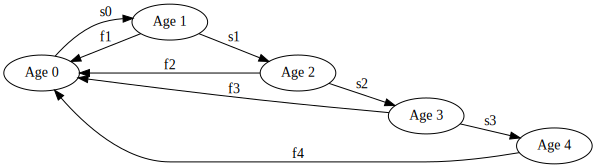

In [5]:
pop = Digraph("pop")
pop.attr(rankdir='LR')

p = list(range(5))
with pop.subgraph() as c:
#    c.attr(rank='same')
    for i in p:
        c.node(f"Age {i}")

for i in p:
    if i+1 in p:
        pop.edge(f"Age {i}",f"Age {i+1}",f"s{i}")
    if i != 0:
        pop.edge(f"Age {i}","Age 0",f"f{i}")
    
pop

Interpreting this model
-----------------------

- at time 0, suppose that the size of the population which is of age 0 is equal to $p_0$, the size of the population of age 1 is equal to $p_1$, etc.

  More succinctly, the population is described by the sequence $(p_0,p_1,\dots)$.
  
  Note that the total population is equal to the sum $\displaystyle \sum_{i=0}^\infty p_i$, which looks a bit odd! But, the infinite sum isn't really infinite -- $p_i$ must be equal to 0 for all sufficiently large values of $i$).
  


- at time 1, the size of the population of age 0 is given by

  $\displaystyle f_1 p_1 + f_2 p_2 + \cdots = \sum_{i = 1}^\infty f_i p_i$.
  
  The size of the population of age 1 is given by $s_0 \cdot p_0$, and more generally
  for $i \ge 1$ the size of the population of age $i$ is given by $s_{i-1}p_{i-1}$.
  
  Thus the population at time 1 is described by the sequence
  
  $\displaystyle (\sum_{i=1}^\infty f_i p_i,\, s_0p_0,\, s_1p_1,\, \dots)$
  
  And in particular the total population at time 1 is given by
  
  $\displaystyle \sum_{i=1}^\infty f_i p_i + \sum_{j=0}^\infty s_jp_j.$

- at time 2,

  it is easy to see that for $i > 1$, the size of the population of age $i$ is equal to
  $s_{i-1} s_{i-2} p_{i-2}$ 
  
  The sizes of the populations having age $0$ and $1$ have a more complicated description!!
  
Given a "better" description of the population(s) at all times $t \ge 0$, we might hope to answer questions such as: "is the population decaying or growing?"

Matrix description
------------------

We are now going to give a more compact description of the preceding example, under an additional assumption.

Let's suppose that the lifespan of the populace is no more than 7 time units -- i.e. we suppose that $s_{7} = 0$.

Under this assumption, we can represent the population at time $t$ by a vector
$$\mathbf{p}^{(t)} = \begin{bmatrix} p_0 \\ p_1 \\ \vdots \\ p_7 \end{bmatrix} \in \mathbb{R}^{8}$$



If the population at time $t$ is described by $\mathbf{p}^{(t)} = \begin{bmatrix} p_0 \\ p_1 \\ \vdots \\ p_7 \end{bmatrix}$ then the population at time $t+1$ is given by
$$\mathbf{p}^{(t+1)} = \begin{bmatrix} \sum_{i=0}^7 f_i p_i \\ s_0p_0 \\ \vdots \\ s_6 p_6 \end{bmatrix}
= A\mathbf{p}^{(t)}$$
where $$A = \begin{bmatrix}
f_0 & f_1 & f_2 & \cdots & f_6 & f_7 \\
s_0 & 0 & 0  & \cdots & 0 & 0 \\
0 & s_1 & 0  & \cdots & 0 & 0  \\
0 & 0 & s_2  & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \cdots  & s_6 & 0  
\end{bmatrix}.$$


Thus if we begin with population $\mathbf{p}^{(0)} = \begin{bmatrix} p_0 \\ p_1 \\ \vdots \\ p_9 \end{bmatrix}$,
then

$$\mathbf{p}^{(1)} = A \mathbf{p}^{(0)}$$

and

$$\mathbf{p}^{(2)} = A \mathbf{p}^{(1)} = A \cdot A \cdot \mathbf{p}^{(0)} = A^2 \mathbf{p}^{(0)}$$.

where $A^2$ denotes the $A \cdot A$, the *square* or *second power* of the matrix $A$.


In general, for $j \ge 0$ we have
$$\mathbf{p}^{(j)} = A^j \mathbf{p}^{(0)}$$

Thus computing the long-range behaviour of the system amounts to understanding the powers $A^j$ of the $8 \times 8$ matrix $A$.

In particular, we find the total population at time $t$ by computing
$$\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix} \cdot A \cdot \mathbf{p}^{(t)}.$$

Let's compute several $\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix} \cdot A^j$ for a particular $A$, namely
when we make the following assumptions on the $f_i$ and $s_i$:

```
fA = [.30,.50,.35,.25,.25,.15,.15,.5]
sA = [.30,.60,.55,.50,.30,.15,.05,0]
```

In [67]:
import numpy as np


float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})


def sbv(index,size):
    return np.array([1.0 if i == index-1 else 0.0 for i in range(size)])

ones = np.ones(8)

fA = [.30,.50,.35,.25,.25,.15,.15,.5]
sA = [.30,.60,.55,.50,.30,.15,.05,0]

def powers(f=8*[1],s=8*[1],iter=50,skip=1):
    A = np.array([np.array(f)]
                 +
                 [s[i]*sbv(i,8) for i in range(7)])

    s1 = ["  j - [ 1 1 ... 1 ] @ A^j","=== - ========================================="]
    s2 =[f"{j*skip: 4d} - {one @ np.linalg.matrix_power(A,j*skip)}"
              for j in range(iter)]
    return "\n".join(s1 + s2)

print(powers(f=fA,s=sA,iter=20))

  j - [ 1 1 ... 1 ] @ A^j
=== - =========================================
   0 - [1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00]
   1 - [0.90 1.05 0.85 0.55 0.40 0.20 0.15 0.50]
   2 - [0.78 0.75 0.51 0.29 0.25 0.16 0.14 0.45]
   3 - [0.54 0.55 0.40 0.24 0.22 0.14 0.12 0.39]
   4 - [0.40 0.41 0.30 0.18 0.15 0.10 0.08 0.27]
   5 - [0.30 0.30 0.22 0.13 0.11 0.07 0.06 0.20]
   6 - [0.22 0.22 0.16 0.10 0.08 0.05 0.04 0.15]
   7 - [0.16 0.16 0.12 0.07 0.06 0.04 0.03 0.11]
   8 - [0.12 0.12 0.09 0.05 0.05 0.03 0.02 0.08]
   9 - [0.09 0.09 0.06 0.04 0.03 0.02 0.02 0.06]
  10 - [0.07 0.07 0.05 0.03 0.02 0.02 0.01 0.04]
  11 - [0.05 0.05 0.04 0.02 0.02 0.01 0.01 0.03]
  12 - [0.04 0.04 0.03 0.02 0.01 0.01 0.01 0.02]
  13 - [0.03 0.03 0.02 0.01 0.01 0.01 0.01 0.02]
  14 - [0.02 0.02 0.01 0.01 0.01 0.00 0.00 0.01]
  15 - [0.01 0.01 0.01 0.01 0.01 0.00 0.00 0.01]
  16 - [0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.01]
  17 - [0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.01]
  18 - [0.01 0.01 0.00 0.00 0.00 0.00 0.00 0

Case ``fA,sA``
----------

The calculations above show that 
$$\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix} \cdot A^j = \mathbf{0} \quad \text{for} \quad j  \ge 20.$$

Thus with the given matrix $A$, the total population will always decay to 0 after 20 time units!

--------


Now let's consider different probabilities, as follows:

```
fB = [.50,.70,.55,.35,.35,.15,.15,.5]
sB = [.40,.70,.55,.50,.35,.15,.05,0]
```

In [69]:
fB = [.50,.70,.55,.35,.35,.15,.15,.5]
sB = [.40,.70,.55,.50,.35,.15,.05,0]

print(powers(f=fB,s=sB,iter=20,skip=20))

  j - [ 1 1 ... 1 ] @ A^j
=== - =========================================
   0 - [1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00]
  20 - [1.53 1.40 1.12 0.62 0.57 0.27 0.23 0.76]
  40 - [1.85 1.69 1.34 0.75 0.68 0.32 0.27 0.92]
  60 - [2.23 2.04 1.62 0.91 0.82 0.39 0.33 1.10]
  80 - [2.68 2.45 1.95 1.09 0.99 0.46 0.40 1.33]
 100 - [3.23 2.95 2.35 1.31 1.19 0.56 0.48 1.60]
 120 - [3.89 3.56 2.83 1.58 1.43 0.67 0.58 1.93]
 140 - [4.68 4.28 3.41 1.90 1.73 0.81 0.70 2.32]
 160 - [5.64 5.16 4.10 2.29 2.08 0.98 0.84 2.79]
 180 - [6.79 6.21 4.94 2.76 2.50 1.18 1.01 3.36]
 200 - [8.18 7.48 5.95 3.33 3.02 1.42 1.22 4.05]
 220 - [9.85 9.01 7.17 4.01 3.63 1.71 1.46 4.88]
 240 - [11.86 10.86 8.63 4.83 4.38 2.05 1.76 5.88]
 260 - [14.29 13.07 10.39 5.81 5.27 2.47 2.12 7.08]
 280 - [17.20 15.75 12.52 7.00 6.35 2.98 2.56 8.52]
 300 - [20.72 18.96 15.08 8.43 7.64 3.59 3.08 10.26]
 320 - [24.95 22.84 18.16 10.15 9.20 4.32 3.71 12.36]
 340 - [30.05 27.50 21.87 12.23 11.08 5.20 4.47 14.89]
 360 - [36.19 33.12 2

Case ``fB,sB``
----------

In this case, note that the first entry of the vector $$\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix} \cdot A^j$$
appears to be an increasing function of $j$.

Thus, for example we expect that given an initial population $\mathbf{p}^{(0)}$ with $p_0 >0$, the total population is increasing as a funcion of $j$, rather than decaying.